## EDA Terremotos desde 1900 -2022

## Importar Librerias

In [26]:
import requests
import zipfile
import pandas as pd
import numpy as np
import folium
import geocoder
import altair
import os
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import plotly.express as px
import seaborn as sns


from geopy.geocoders import Nominatim
from folium import plugins
from matplotlib.animation import FuncAnimation



## Importar CVS

In [27]:
# Ruta del directorio donde se extrajo el contenido del ZIP
directorio_destino = r'C:\Users\fquin\OneDrive\Escritorio\DS-Jessy\EDA\Terremoto 1990-2022'

# Lista para almacenar DataFrames de cada archivo
dataframes = []

# Itera sobre todos los archivos en el directorio
for archivo in os.listdir(directorio_destino):
    if archivo.endswith('.csv'):  # Ajusta la extensión si tus archivos son de otro tipo
        ruta_archivo = os.path.join(directorio_destino, archivo)
        # Lee el archivo CSV y almacena el DataFrame en la lista
        df = pd.read_csv(ruta_archivo)
        dataframes.append(df)

# Concatena todos los DataFrames en uno solo
dfterremotos = pd.concat(dataframes, ignore_index=True)


# Muestra el resultado final
print(dfterremotos)

                           Time                               Place  Latitude  \
0      2023-02-17T09:37:34.868Z        130 km SW of Tual, Indonesia   -6.5986   
1      2023-02-16T05:37:05.138Z       7 km SW of Port-Olry, Vanuatu  -15.0912   
2      2023-02-15T18:10:10.060Z         Masbate region, Philippines   12.3238   
3      2023-02-15T06:38:09.034Z     54 km WNW of Otaki, New Zealand  -40.5465   
4      2023-02-14T13:16:51.072Z         2 km NW of Lele?ti, Romania   45.1126   
...                         ...                                 ...       ...   
37326  1902-01-01T05:20:30.000Z      113 km ESE of Nikolski, Alaska   52.3800   
37327  1901-12-31T09:02:30.000Z       221 km SW of Nikolski, Alaska   51.4500   
37328  1901-12-30T22:34:00.000Z                     south of Alaska   52.0000   
37329  1901-03-03T07:45:00.000Z  12 km NNW of Parkfield, California   36.0000   
37330  1900-10-09T12:25:00.000Z      16 km SW of Old Harbor, Alaska   57.0900   

       Longitude   Depth   

In [28]:
dfterremotos.shape

(37331, 23)

In [29]:
dfterremotos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             37331 non-null  object 
 1   Place            37047 non-null  object 
 2   Latitude         37331 non-null  float64
 3   Longitude        37331 non-null  float64
 4   Depth            37197 non-null  float64
 5   Mag              37331 non-null  float64
 6   MagType          37331 non-null  object 
 7   nst              7473 non-null   float64
 8   gap              10087 non-null  float64
 9   dmin             4395 non-null   float64
 10  rms              20218 non-null  float64
 11  net              37331 non-null  object 
 12  ID               37331 non-null  object 
 13  Updated          37331 non-null  object 
 14  Unnamed: 14      0 non-null      float64
 15  Type             37331 non-null  object 
 16  horizontalError  3970 non-null   float64
 17  depthError  

## Limpieza del DataFrame

In [30]:
dfterremotos = dfterremotos.drop(['horizontalError', 'depthError', 'magError', 'magNst','Unnamed: 14', 'dmin','gap','nst','Depth','rms'], axis=1)

print(dfterremotos)

                           Time                               Place  Latitude  \
0      2023-02-17T09:37:34.868Z        130 km SW of Tual, Indonesia   -6.5986   
1      2023-02-16T05:37:05.138Z       7 km SW of Port-Olry, Vanuatu  -15.0912   
2      2023-02-15T18:10:10.060Z         Masbate region, Philippines   12.3238   
3      2023-02-15T06:38:09.034Z     54 km WNW of Otaki, New Zealand  -40.5465   
4      2023-02-14T13:16:51.072Z         2 km NW of Lele?ti, Romania   45.1126   
...                         ...                                 ...       ...   
37326  1902-01-01T05:20:30.000Z      113 km ESE of Nikolski, Alaska   52.3800   
37327  1901-12-31T09:02:30.000Z       221 km SW of Nikolski, Alaska   51.4500   
37328  1901-12-30T22:34:00.000Z                     south of Alaska   52.0000   
37329  1901-03-03T07:45:00.000Z  12 km NNW of Parkfield, California   36.0000   
37330  1900-10-09T12:25:00.000Z      16 km SW of Old Harbor, Alaska   57.0900   

       Longitude   Mag MagT

In [31]:
dfterremotos['Year'] = dfterremotos['Time'].astype(str).str.extract(r'^(\d{4})')


print(dfterremotos)

                           Time                               Place  Latitude  \
0      2023-02-17T09:37:34.868Z        130 km SW of Tual, Indonesia   -6.5986   
1      2023-02-16T05:37:05.138Z       7 km SW of Port-Olry, Vanuatu  -15.0912   
2      2023-02-15T18:10:10.060Z         Masbate region, Philippines   12.3238   
3      2023-02-15T06:38:09.034Z     54 km WNW of Otaki, New Zealand  -40.5465   
4      2023-02-14T13:16:51.072Z         2 km NW of Lele?ti, Romania   45.1126   
...                         ...                                 ...       ...   
37326  1902-01-01T05:20:30.000Z      113 km ESE of Nikolski, Alaska   52.3800   
37327  1901-12-31T09:02:30.000Z       221 km SW of Nikolski, Alaska   51.4500   
37328  1901-12-30T22:34:00.000Z                     south of Alaska   52.0000   
37329  1901-03-03T07:45:00.000Z  12 km NNW of Parkfield, California   36.0000   
37330  1900-10-09T12:25:00.000Z      16 km SW of Old Harbor, Alaska   57.0900   

       Longitude   Mag MagT

In [32]:
dfterremotos['Time'] = pd.to_datetime(dfterremotos['Time'])

df_filtered = dfterremotos[(dfterremotos['Time'].dt.year >= 1900) & (dfterremotos['Time'].dt.year <= 2023)]


total_terremotos_por_año = df_filtered.groupby(df_filtered['Time'].dt.year).size().reset_index(name='Total Terremotos')


print(total_terremotos_por_año)

     Time  Total Terremotos
0    1900                 1
1    1901                 3
2    1902                 2
3    1903                 5
4    1904                 9
..    ...               ...
119  2019               443
120  2020               404
121  2021               561
122  2022               447
123  2023                62

[124 rows x 2 columns]


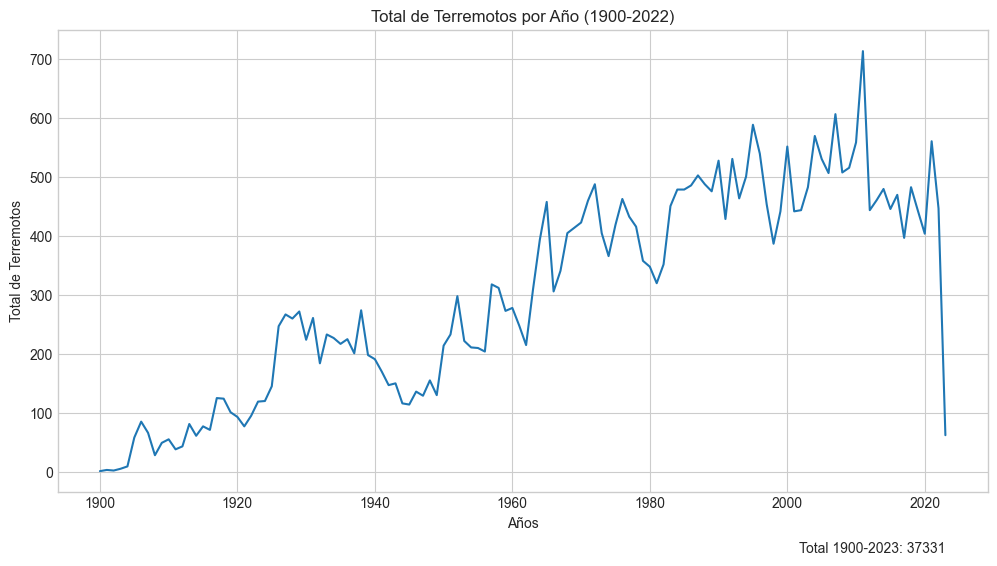

In [33]:
total_terremotos_total = total_terremotos_por_año['Total Terremotos'].sum()


plt.figure(figsize=(12, 6))
sns.lineplot(data=total_terremotos_por_año, x='Time', y='Total Terremotos')
plt.title('Total de Terremotos por Año (1900-2022)')
plt.xlabel('Años')
plt.ylabel('Total de Terremotos')
plt.text(total_terremotos_por_año['Time'].iloc[-1], total_terremotos_por_año['Total Terremotos'].iloc[-1] - 200,
         f'Total 1900-2023: {total_terremotos_total}', ha='right')

plt.show()

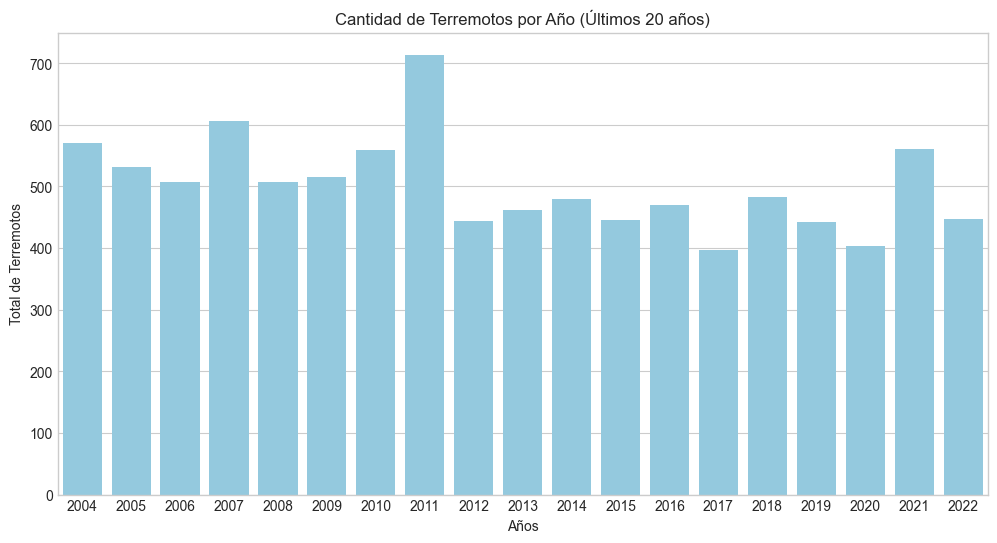

In [34]:
df = df.dropna(subset=['Mag', 'ID'])
df['Time'] = pd.to_datetime(df['Time'])

current_year = pd.to_datetime('now').year
df_filtered = df[df['Time'].dt.year.between(current_year - 20, current_year - 1) & (df['Time'].dt.year < 2023)]

total_terremotos_por_año = df_filtered.groupby(df_filtered['Time'].dt.year).size().reset_index(name='Total Terremotos')

plt.figure(figsize=(12, 6))
sns.barplot(data=total_terremotos_por_año, x='Time', y='Total Terremotos', color='skyblue')
plt.title('Cantidad de Terremotos por Año (Últimos 20 años)')
plt.xlabel('Años')
plt.ylabel('Total de Terremotos')

plt.show()

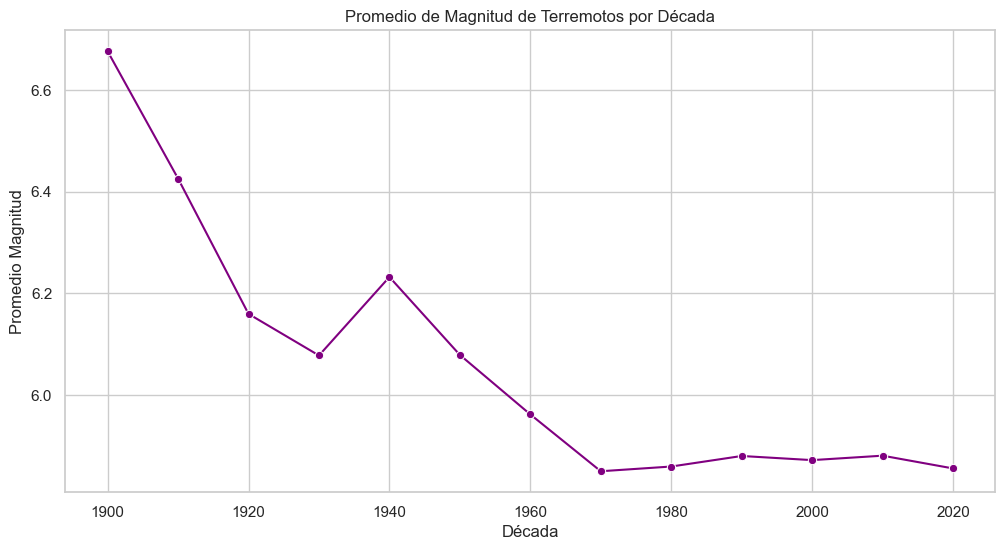

In [35]:
dfterremotos['Year'] = pd.to_numeric(dfterremotos['Year'], errors='coerce')

dfterremotos['Decada'] = (dfterremotos['Year'] // 10) * 10

max_magnitudes_por_decada = dfterremotos.groupby('Decada')['Mag'].mean()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=max_magnitudes_por_decada.index, y=max_magnitudes_por_decada.values, marker='o', color='purple')

plt.title('Promedio de Magnitud de Terremotos por Década')
plt.xlabel('Década')
plt.ylabel('Promedio Magnitud')
plt.show()

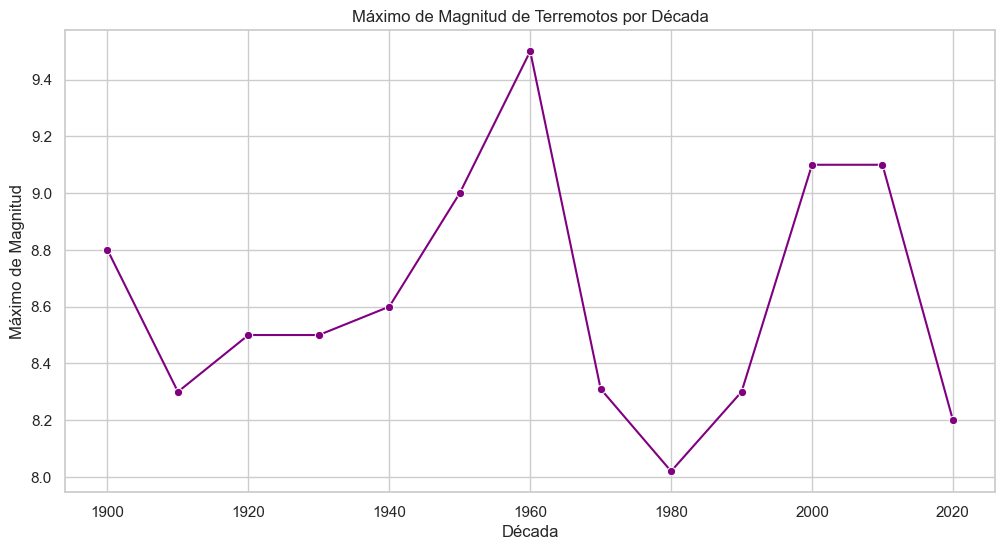

In [36]:
dfterremotos['Year'] = pd.to_numeric(dfterremotos['Year'], errors='coerce')

dfterremotos['Decada'] = (dfterremotos['Year'] // 10) * 10

max_magnitudes_por_decada = dfterremotos.groupby('Decada')['Mag'].max().reset_index(name='Max_Mag')

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Decada', y='Max_Mag', data=max_magnitudes_por_decada, marker='o', color='purple')

plt.title('Máximo de Magnitud de Terremotos por Década')
plt.xlabel('Década')
plt.ylabel('Máximo de Magnitud')
plt.show()

In [37]:
dfterremotos['Year'] = pd.to_datetime(dfterremotos['Year'], errors='coerce')

dfterremotos['Decada'] = (dfterremotos['Year'].dt.year // 10) * 10

max_magnitudes_por_decada = dfterremotos.groupby('Decada')['Mag'].max().reset_index(name='Max_Mag_Decada')

print(max_magnitudes_por_decada)

   Decada  Max_Mag_Decada
0    1970             9.5


In [38]:
dfterremotos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Time            37331 non-null  datetime64[ns, UTC]
 1   Place           37047 non-null  object             
 2   Latitude        37331 non-null  float64            
 3   Longitude       37331 non-null  float64            
 4   Mag             37331 non-null  float64            
 5   MagType         37331 non-null  object             
 6   net             37331 non-null  object             
 7   ID              37331 non-null  object             
 8   Updated         37331 non-null  object             
 9   Type            37331 non-null  object             
 10  status          37331 non-null  object             
 11  locationSource  37331 non-null  object             
 12  magSource       37331 non-null  object             
 13  Year            37331 non-null 

In [39]:
def limpiar_dataframe(df):
    
    palabras_a_buscar = ['islands', 'island', 'south', 'southeast', 'océano', 'pacífico', 'ocean', 'atlantic', 'east', 'Índico', 'South', 'Kahramanmaras']
 
    mascara = df.apply(lambda row: any(palabra in str(row) for palabra in palabras_a_buscar), axis=1)

    df_filtrado = df[~mascara]

    return df_filtrado

dfterremoto = limpiar_dataframe(dfterremotos)

print(dfterremotos)

                                  Time                               Place  \
0     2023-02-17 09:37:34.868000+00:00        130 km SW of Tual, Indonesia   
1     2023-02-16 05:37:05.138000+00:00       7 km SW of Port-Olry, Vanuatu   
2     2023-02-15 18:10:10.060000+00:00         Masbate region, Philippines   
3     2023-02-15 06:38:09.034000+00:00     54 km WNW of Otaki, New Zealand   
4     2023-02-14 13:16:51.072000+00:00         2 km NW of Lele?ti, Romania   
...                                ...                                 ...   
37326        1902-01-01 05:20:30+00:00      113 km ESE of Nikolski, Alaska   
37327        1901-12-31 09:02:30+00:00       221 km SW of Nikolski, Alaska   
37328        1901-12-30 22:34:00+00:00                     south of Alaska   
37329        1901-03-03 07:45:00+00:00  12 km NNW of Parkfield, California   
37330        1900-10-09 12:25:00+00:00      16 km SW of Old Harbor, Alaska   

       Latitude  Longitude   Mag MagType    net          ID  \


In [40]:
def limpiar_dataframe(df):
   
    palabras_a_buscar = ['Mid', 'Sea', 'Drake', ' Laikit']

    mascara = df.apply(lambda row: any(palabra in str(row) for palabra in palabras_a_buscar), axis=1)

    df_filtrado = df[~mascara]

    return df_filtrado

dfterremotos = limpiar_dataframe(dfterremotos)

print(dfterremotos)

                                  Time                               Place  \
0     2023-02-17 09:37:34.868000+00:00        130 km SW of Tual, Indonesia   
1     2023-02-16 05:37:05.138000+00:00       7 km SW of Port-Olry, Vanuatu   
2     2023-02-15 18:10:10.060000+00:00         Masbate region, Philippines   
3     2023-02-15 06:38:09.034000+00:00     54 km WNW of Otaki, New Zealand   
4     2023-02-14 13:16:51.072000+00:00         2 km NW of Lele?ti, Romania   
...                                ...                                 ...   
37326        1902-01-01 05:20:30+00:00      113 km ESE of Nikolski, Alaska   
37327        1901-12-31 09:02:30+00:00       221 km SW of Nikolski, Alaska   
37328        1901-12-30 22:34:00+00:00                     south of Alaska   
37329        1901-03-03 07:45:00+00:00  12 km NNW of Parkfield, California   
37330        1900-10-09 12:25:00+00:00      16 km SW of Old Harbor, Alaska   

       Latitude  Longitude   Mag MagType    net          ID  \


In [41]:
def limpiar_direccion(row):
    
    place_str = str(row['Place'])
    
    match = re.search(r',\s*([^,]+)$', place_str)
    if match:
               return match.group(1).strip()
    else:
        return place_str

dfterremotos['Pais'] = dfterremotos.apply(limpiar_direccion, axis=1)

print(dfterremotos)


                                  Time                               Place  \
0     2023-02-17 09:37:34.868000+00:00        130 km SW of Tual, Indonesia   
1     2023-02-16 05:37:05.138000+00:00       7 km SW of Port-Olry, Vanuatu   
2     2023-02-15 18:10:10.060000+00:00         Masbate region, Philippines   
3     2023-02-15 06:38:09.034000+00:00     54 km WNW of Otaki, New Zealand   
4     2023-02-14 13:16:51.072000+00:00         2 km NW of Lele?ti, Romania   
...                                ...                                 ...   
37326        1902-01-01 05:20:30+00:00      113 km ESE of Nikolski, Alaska   
37327        1901-12-31 09:02:30+00:00       221 km SW of Nikolski, Alaska   
37328        1901-12-30 22:34:00+00:00                     south of Alaska   
37329        1901-03-03 07:45:00+00:00  12 km NNW of Parkfield, California   
37330        1900-10-09 12:25:00+00:00      16 km SW of Old Harbor, Alaska   

       Latitude  Longitude   Mag MagType    net          ID  \


In [42]:
dfterremotos = dfterremotos[~dfterremotos['Pais'].str.contains('Islands|Wallis|nan|Pacific|Timor|Fiji|Macquarie|Carlsberg|Micronesia')]

In [43]:
dfterremotos = dfterremotos[~dfterremotos['Pais'].str.contains('Atlantic|East|Atlántico Norte|Kerguelen|Guam|Tonga|Vanuatu')]

In [44]:
dfterremotos = dfterremotos[~dfterremotos['Pais'].str.contains('western|off|Oceano|west|New|north|South|southeast|Reykjanes|Banda')]  

In [45]:
dfterremotos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22305 entries, 0 to 37330
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Time            22305 non-null  datetime64[ns, UTC]
 1   Place           22305 non-null  object             
 2   Latitude        22305 non-null  float64            
 3   Longitude       22305 non-null  float64            
 4   Mag             22305 non-null  float64            
 5   MagType         22305 non-null  object             
 6   net             22305 non-null  object             
 7   ID              22305 non-null  object             
 8   Updated         22305 non-null  object             
 9   Type            22305 non-null  object             
 10  status          22305 non-null  object             
 11  locationSource  22305 non-null  object             
 12  magSource       22305 non-null  object             
 13  Year            22305 non-null  date

In [46]:
diccionario_sustitucion = {
    'South Sandwich Islands region : Reino Unido'
'Kermadec Islands region : Nueva Zelanda'
'South of the Fiji Islands : Fiji'
'South of the Kermadec Islands : Océano Pacífico Sur'
'Pacific-Antarctic Ridge : Océano Pacífico'
'Southern Mid-Atlantic Ridge : Atlántico Sur'
'Northern Mid-Atlantic Ridge : Atlántico Norte'
'Argentina : Argentina'
'Southeast of the Loyalty Islands : Francia'
'Southern East Pacific Rise : Chile'
'Greece : Grecia'
'Central Mid-Atlantic Ridge : Atlántico Central'
'West Chile Rise : Chile'
'Balleny Islands region : Nueva Zelanda'
'Carlsberg Ridge : Océano Índico'
'Vanuatu region : Vanuatu'
'West of Macquarie Island : Océano Pacífico Sur'
'Southeast of Easter Island : Océano Pacífico Sur'
'Reykjanes Ridge : Atlántico Norte'
'Southwest Indian Ridge : Océano Índico'
'North of Ascension Island : Océano Atlántico'
'Western Indian-Antarctic Ridge : Océano Índico'
'Southeast Indian Ridge : Océano Índico'
'East of the Kuril Islands : Océano Pacífico Norte'
'Off the coast of Oregon : Estados Unidos'
'Prince Edward Islands region : Sudáfrica'
'East of the South Sandwich Islands : Océano Atlántico Sur'
'Off the west coast of northern Sumatra : Indonesia'
'Macquarie Island region : Australia'
'Bouvet Island region : Noruega'
'Northern East Pacific Rise : Océano Pacífico Norte'
'Owen Fracture Zone region : Océano Índico'
'Chagos Archipelago region : Territorio Británico del Océano Índico'
}

dfterremotos['Pais'] = dfterremotos['Pais'].replace(to_replace=diccionario_sustitucion, value=None)

print(dfterremotos)

                                  Time                               Place  \
0     2023-02-17 09:37:34.868000+00:00        130 km SW of Tual, Indonesia   
2     2023-02-15 18:10:10.060000+00:00         Masbate region, Philippines   
4     2023-02-14 13:16:51.072000+00:00         2 km NW of Lele?ti, Romania   
6     2023-02-11 15:31:26.464000+00:00             Tristan da Cunha region   
11    2023-02-07 03:13:12.767000+00:00         8 km ESE of Gölba??, Turkey   
...                                ...                                 ...   
37326        1902-01-01 05:20:30+00:00      113 km ESE of Nikolski, Alaska   
37327        1901-12-31 09:02:30+00:00       221 km SW of Nikolski, Alaska   
37328        1901-12-30 22:34:00+00:00                     south of Alaska   
37329        1901-03-03 07:45:00+00:00  12 km NNW of Parkfield, California   
37330        1900-10-09 12:25:00+00:00      16 km SW of Old Harbor, Alaska   

       Latitude  Longitude   Mag MagType    net          ID  \


## Unificación de los nombres de países 

In [47]:
dfterremotos['Pais'] = dfterremotos['Pais'].apply(lambda x: 'Chile' if 'Chile' in str(x) else x)

In [48]:
dfterremotos['Pais'] = dfterremotos['Pais'].apply(lambda x: 'Turkey' if 'Turkey' in str(x) else x)

In [49]:
dfterremotos['Pais'] = dfterremotos['Pais'].apply(lambda x: 'Japan' if 'Japan region' in str(x) else x)

In [50]:
dfterremotos['Pais'] = dfterremotos['Pais'].apply(lambda x: 'Alaska' if 'Alaska' in str(x) else x)

In [51]:
dfterremotos['Pais'] = dfterremotos['Pais'].apply(lambda x: 'India' if 'India' in str(x) else x)

In [52]:
dfterremotos['Pais'] = dfterremotos['Pais'].apply(lambda x: 'Afghanistan' if 'Afghanistan' in str(x) else x)

In [53]:
lista_nombres = ['Alaska', 'California', 'Nevada','Oregon','Washington']

cambiar_nombres = lambda x: 'EEUU' if x in lista_nombres else x

dfterremotos['Pais'] = dfterremotos['Pais'].apply(cambiar_nombres)

In [54]:
dfterremotos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22305 entries, 0 to 37330
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Time            22305 non-null  datetime64[ns, UTC]
 1   Place           22305 non-null  object             
 2   Latitude        22305 non-null  float64            
 3   Longitude       22305 non-null  float64            
 4   Mag             22305 non-null  float64            
 5   MagType         22305 non-null  object             
 6   net             22305 non-null  object             
 7   ID              22305 non-null  object             
 8   Updated         22305 non-null  object             
 9   Type            22305 non-null  object             
 10  status          22305 non-null  object             
 11  locationSource  22305 non-null  object             
 12  magSource       22305 non-null  object             
 13  Year            22305 non-null  date

## Se crea columna de YEAR

In [55]:
dfterremotos['Year'] = dfterremotos['Time'].astype(str).str.extract(r'^(\d{4})')

print(dfterremotos)

                                  Time                               Place  \
0     2023-02-17 09:37:34.868000+00:00        130 km SW of Tual, Indonesia   
2     2023-02-15 18:10:10.060000+00:00         Masbate region, Philippines   
4     2023-02-14 13:16:51.072000+00:00         2 km NW of Lele?ti, Romania   
6     2023-02-11 15:31:26.464000+00:00             Tristan da Cunha region   
11    2023-02-07 03:13:12.767000+00:00         8 km ESE of Gölba??, Turkey   
...                                ...                                 ...   
37326        1902-01-01 05:20:30+00:00      113 km ESE of Nikolski, Alaska   
37327        1901-12-31 09:02:30+00:00       221 km SW of Nikolski, Alaska   
37328        1901-12-30 22:34:00+00:00                     south of Alaska   
37329        1901-03-03 07:45:00+00:00  12 km NNW of Parkfield, California   
37330        1900-10-09 12:25:00+00:00      16 km SW of Old Harbor, Alaska   

       Latitude  Longitude   Mag MagType    net          ID  \


In [56]:
dfterremotos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22305 entries, 0 to 37330
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Time            22305 non-null  datetime64[ns, UTC]
 1   Place           22305 non-null  object             
 2   Latitude        22305 non-null  float64            
 3   Longitude       22305 non-null  float64            
 4   Mag             22305 non-null  float64            
 5   MagType         22305 non-null  object             
 6   net             22305 non-null  object             
 7   ID              22305 non-null  object             
 8   Updated         22305 non-null  object             
 9   Type            22305 non-null  object             
 10  status          22305 non-null  object             
 11  locationSource  22305 non-null  object             
 12  magSource       22305 non-null  object             
 13  Year            22305 non-null  obje

## 30 países principales que registran terremotos

In [57]:
paises_deseados = ['Indonesia', 'Japan', 'EEUU', 'Russia', 'Philippines', 'Chile', 'Mexico', 'China', 
                   'Peru', 'India', 'Taiwan', 'Greece', 'Iran', 'Turkey', 'Argentina', 'Panama', 
                   'Afghanistan', 'Guatemala', 'Pakistan', 'Ecuador', 'Nicaragua', 'Colombia', 
                   'Canada', 'Myanmar', 'Costa Rica', 'Kazakhstan', 'El Salvador', 'Tajikistan', 
                   'Italy', 'Kyrgyzstan']


dfterremotos_30 = dfterremotos[dfterremotos['Pais'].isin(paises_deseados)]



In [58]:
dfterremotos_30

,Time,Place,Latitude,Longitude,Mag,MagType,net,ID,Updated,Type,status,locationSource,magSource,Year,Decada,Pais
0,2023-02-17 09:37:34.868000+00:00,"130 km SW of Tual, Indonesia",-6.5986,132.0763,6.10,mww,us,us6000jpl7,2023-02-17T17:58:24.040Z,earthquake,reviewed,us,us,2023,1970,Indonesia
2,2023-02-15 18:10:10.060000+00:00,"Masbate region, Philippines",12.3238,123.8662,6.10,mww,us,us6000jp76,2023-02-16T20:12:32.595Z,earthquake,reviewed,us,us,2023,1970,Philippines
11,2023-02-07 03:13:12.767000+00:00,"8 km ESE of Gölba??, Turkey",37.7582,37.7303,5.50,mww,us,us6000jm5e,2023-02-09T21:31:31.564Z,earthquake,reviewed,us,us,2023,1970,Turkey
12,2023-02-07 00:35:51.673000+00:00,"81 km WSW of Pelabuhanratu, Indonesia",-7.3450,105.9037,5.50,mb,us,us6000jm4c,2023-02-08T14:33:57.388Z,earthquake,reviewed,us,us,2023,1970,Indonesia
13,2023-02-06 12:02:11.825000+00:00,"5 km NE of Göksun, Turkey",38.0605,36.5370,6.00,mb,us,us6000jlrc,2023-02-16T21:13:41.161Z,earthquake,reviewed,us,us,2023,1970,Turkey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37326,1902-01-01 05:20:30+00:00,"113 km ESE of Nikolski, Alaska",52.3800,-167.4500,7.00,ms,ushis,ushis400,2018-06-04T20:43:44.000Z,earthquake,reviewed,ushis,abe,1902,1970,EEUU
37327,1901-12-31 09:02:30+00:00,"221 km SW of Nikolski, Alaska",51.4500,-171.0200,7.10,ms,ushis,ushis399,2018-06-04T20:43:44.000Z,earthquake,reviewed,ushis,abe,1901,1970,EEUU
37328,1901-12-30 22:34:00+00:00,south of Alaska,52.0000,-160.0000,7.00,ms,ushis,ushis397,2018-06-04T20:43:44.000Z,earthquake,reviewed,ushis,abe,1901,1970,EEUU
37329,1901-03-03 07:45:00+00:00,"12 km NNW of Parkfield, California",36.0000,-120.5000,6.40,ms,ushis,ushis393,2018-06-04T20:43:44.000Z,earthquake,reviewed,ushis,ell,1901,1970,EEUU


In [59]:
total_terremotos_por_pais = dfterremotos_30['Pais'].value_counts()

df_total_terremotos_por_pais = pd.DataFrame({
    'Pais': total_terremotos_por_pais.index,
    'Total_Terremotos': total_terremotos_por_pais.values
})


print(df_total_terremotos_por_pais)

           Pais  Total_Terremotos
0     Indonesia              3650
1         Japan              3036
2          EEUU              2210
3        Russia              1834
4   Philippines              1612
5         Chile              1256
6        Mexico               816
7         China               678
8          Peru               579
9         India               449
10       Taiwan               441
11       Greece               436
12         Iran               346
13       Turkey               310
14    Argentina               291
15       Panama               214
16  Afghanistan               207
17    Guatemala               189
18     Pakistan               180
19      Ecuador               179
20    Nicaragua               164
21     Colombia               163
22       Canada               162
23      Myanmar               160
24   Costa Rica               132
25   Kazakhstan               121
26  El Salvador               105
27   Tajikistan                95
28        Ital

In [60]:
dfterremotos_30.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20177 entries, 0 to 37330
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Time            20177 non-null  datetime64[ns, UTC]
 1   Place           20177 non-null  object             
 2   Latitude        20177 non-null  float64            
 3   Longitude       20177 non-null  float64            
 4   Mag             20177 non-null  float64            
 5   MagType         20177 non-null  object             
 6   net             20177 non-null  object             
 7   ID              20177 non-null  object             
 8   Updated         20177 non-null  object             
 9   Type            20177 non-null  object             
 10  status          20177 non-null  object             
 11  locationSource  20177 non-null  object             
 12  magSource       20177 non-null  object             
 13  Year            20177 non-null  obje

In [61]:
paises = [
    "Indonesia", "Japan", "EEUU", "Russia", "Philippines", "Chile", "Mexico", "China",
    "Peru", "India", "Taiwan", "Greece", "Iran", "Turkey", "Argentina", "Panama",
    "Afghanistan", "Guatemala", "Pakistan", "Ecuador", "Nicaragua", "Colombia", "Canada",
    "Myanmar", "Costa Rica", "Kazakhstan", "El Salvador", "Tajikistan", "Italy", "Kyrgyzstan"
]


geolocalizador = Nominatim(user_agent="mi_aplicacion")


coordenadas_paises = {}
for pais in paises:
    ubicacion = geolocalizador.geocode(pais)
    if ubicacion:
        coordenadas_paises[pais] = {
            "latitud": ubicacion.latitude,
            "longitud": ubicacion.longitude
        }
    else:
        coordenadas_paises[pais] = None


for pais, coordenadas in coordenadas_paises.items():
    print(f"{pais}: {coordenadas}")

Indonesia: {'latitud': -2.4833826, 'longitud': 117.8902853}
Japan: {'latitud': 36.5748441, 'longitud': 139.2394179}
EEUU: {'latitud': 20.6239332, 'longitud': -105.2224224}
Russia: {'latitud': 64.6863136, 'longitud': 97.7453061}
Philippines: {'latitud': 12.7503486, 'longitud': 122.7312101}
Chile: {'latitud': -31.7613365, 'longitud': -71.3187697}
Mexico: {'latitud': 19.4326296, 'longitud': -99.1331785}
China: {'latitud': 35.000074, 'longitud': 104.999927}
Peru: {'latitud': -6.8699697, 'longitud': -75.0458515}
India: {'latitud': 22.3511148, 'longitud': 78.6677428}
Taiwan: {'latitud': 23.5983227, 'longitud': 120.83537694479215}
Greece: {'latitud': 43.2097838, 'longitud': -77.6930602}
Iran: {'latitud': 32.6475314, 'longitud': 54.5643516}
Turkey: {'latitud': 38.9597594, 'longitud': 34.9249653}
Argentina: {'latitud': -34.9964963, 'longitud': -64.9672817}
Panama: {'latitud': 8.559559, 'longitud': -81.1308434}
Afghanistan: {'latitud': 33.7680065, 'longitud': 66.2385139}
Guatemala: {'latitud': 1

In [62]:
coordenadas_paises = {
    'Indonesia': {'latitud': -2.4833826, 'longitud': 117.8902853},
    'Japan': {'latitud': 36.5748441, 'longitud': 139.2394179},
    'EEUU': {'latitud': 64.2008, 'longitud': -149.4937},
    'Russia': {'latitud': 64.6863136, 'longitud': 97.7453061},
    'Philippines': {'latitud': 12.7503486, 'longitud': 122.7312101},
    'Chile': {'latitud': -31.7613365, 'longitud': -71.3187697},
    'Mexico': {'latitud': 19.4326296, 'longitud': -99.1331785},
    'China': {'latitud': 35.000074, 'longitud': 104.999927},
    'Peru': {'latitud': -6.8699697, 'longitud': -75.0458515},
    'India': {'latitud': 22.3511148, 'longitud': 78.6677428},
    'Taiwan': {'latitud': 23.5983227, 'longitud': 120.83537694479215},
    'Greece': {'latitud': 43.2097838, 'longitud': -77.6930602},
    'Iran': {'latitud': 32.6475314, 'longitud': 54.5643516},
    'Turkey': {'latitud': 38.9597594, 'longitud': 34.9249653},
    'Argentina': {'latitud': -34.9964963, 'longitud': -64.9672817},
    'Panama': {'latitud': 8.559559, 'longitud': -81.1308434},
    'Afghanistan': {'latitud': 33.7680065, 'longitud': 66.2385139},
    'Guatemala': {'latitud': 15.5855545, 'longitud': -90.345759},
    'Pakistan': {'latitud': 30.3308401, 'longitud': 71.247499},
    'Ecuador': {'latitud': -1.3397668, 'longitud': -79.3666965},
    'Nicaragua': {'latitud': 12.6090157, 'longitud': -85.2936911},
    'Colombia': {'latitud': 4.099917, 'longitud': -72.9088133},
    'Canada': {'latitud': 61.0666922, 'longitud': -107.991707},
    'Myanmar': {'latitud': 17.1750495, 'longitud': 95.9999652},
    'Costa Rica': {'latitud': 9.536456900000001, 'longitud': -84.17566257468567},
    'Kazakhstan': {'latitud': 48.1012954, 'longitud': 66.7780818},
    'El Salvador': {'latitud': 13.8000382, 'longitud': -88.9140683},
    'Tajikistan': {'latitud': 38.6281733, 'longitud': 70.8156541},
    'Italy': {'latitud': 42.6384261, 'longitud': 12.674297},
    'Kyrgyzstan': {'latitud': 42.4858224, 'longitud': 74.714583}
}

world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='CartoDB positron')

for row in df_total_terremotos_por_pais.itertuples():
    country_name = row.Pais
    total_terremotos = row.Total_Terremotos
    
    coordinates = coordenadas_paises.get(country_name)

    if coordinates:
       
        latitud, longitud = coordinates['latitud'], coordinates['longitud']

        icon = plugins.BeautifyIcon(
        number=total_terremotos,
        border_color="skyblue",
        border_width=1,
        text_color="black",
        inner_icon_style = "font-size: 12px;"
        )

       
        folium.Marker(
            location=[latitud, longitud],
            popup=f"{country_name}: {total_terremotos} terremotos",
            icon=icon
        ).add_to(world_map)

world_map

## Nota: Cinturón de fuego 

Los estudios indican que el cinturón de fuego del Pacífico se formó como consecuencia del movimiento de las placas tectónicas, las cuales se mueven como resultado de procesos internos del planeta. Está conformada por la zona montañosa del oeste de Argentina, Chile, Perú, Ecuador, Colombia, Panamá, Costa Rica, Nicaragua, El Salvador, Honduras, Guatemala, México, Estados Unidos, Canadá, luego dobla a la altura de las islas Aleutianas y baja por las costas e islas de Rusia, Japón, Taiwán, Filipinas, Indonesia, Malasia, Timor Oriental, Brunéi, Singapur, Papúa Nueva Guinea, Islas Salomón, Tonga, Samoa, Tuvalu y Nueva Zelanda.

In [63]:
coordinates = [
    [-34.9964963, -64.9672817],
    [-31.7613365, -71.3187697],
    [-6.8699697, -75.0458515],
    [-1.3397668, -79.3666965],
    [4.099917, -72.9088133],
    [8.559559, -81.1308434],
    [9.536456900000001, -84.17566257468567],
    [12.6090157, -85.2936911],
    [13.8000382, -88.9140683],
    [15.199999, -86.241905],
    [15.5855545, -90.345759],
    [19.4326296, -99.1331785],
    [37.09024, -95.712891],
    [61.0666922, -107.991707],
    [51.9366065, -176.638239],  
    [56.8389261, 163.4560174],  
    [36.204824, 138.252924],  
    [23.5983227, 120.83537694479215],  
    [12.879721, 121.774017], 
    [-2.4833826, 117.8902853], 
    [4.2104848, 101.975766],
    [-8.874217, 125.727539],  
    [4.535277, 114.727669], 
    [1.352083, 103.819836], 
    [-6.314993, 143.955550], 
    [-9.2002, 160.0598],  
    [-21.178986, -175.198242], 
    [-13.759029, -172.104629], 
    [-7.109534, 177.64933],  
    [-40.900558, 174.886]  
]

map_heatmap = folium.Map([0, 0], tiles='CartoDB Positron', zoom_start=2)

locations = []
for coord in coordinates:
    location = geocoder.osm(coord, method='reverse')
    if location:
        locations.append([location.latlng[0], location.latlng[1]])


plugins.HeatMap(locations).add_to(map_heatmap)


map_heatmap

In [64]:
Terremotos_maximos_indices = dfterremotos_30.groupby('Pais')['Mag'].idxmax()

maximos_Terremotos = dfterremotos_30.loc[Terremotos_maximos_indices]

df_maximos_terremotos = pd.DataFrame({
    'Pais': maximos_Terremotos['Pais'],
    'Magnitud_Maxima': maximos_Terremotos['Mag'],
    'Año': maximos_Terremotos['Year']
})

print(df_maximos_terremotos)

              Pais  Magnitud_Maxima   Año
36083  Afghanistan             7.80  1921
30880    Argentina             7.69  1949
4732        Canada             7.80  2012
28284        Chile             9.50  1960
37172        China             7.95  1906
4766      Colombia             7.30  2012
4791    Costa Rica             7.60  2012
27269         EEUU             9.20  1964
3143       Ecuador             7.80  2016
10957  El Salvador             7.70  2001
29376       Greece             7.70  1956
31876    Guatemala             7.70  1942
32047        India             7.96  1941
8875     Indonesia             8.60  2005
4504          Iran             7.70  2013
37268        Italy             7.19  1905
5707         Japan             9.10  2011
16150   Kazakhstan             6.60  1990
36967   Kyrgyzstan             8.02  1911
2547        Mexico             8.20  2017
36920      Myanmar             7.88  1912
15096    Nicaragua             7.70  1992
4309      Pakistan             7.7

In [65]:
valores_nulos = dfterremotos.isnull().sum()

print("Cantidad de valores nulos por columna:")
print(valores_nulos)

hay_nulos = dfterremotos.isnull().values.any()

if hay_nulos:
    print("Hay valores nulos en el DataFrame.")
else:
    print("No hay valores nulos en el DataFrame.")



Cantidad de valores nulos por columna:
Time              0
Place             0
Latitude          0
Longitude         0
Mag               0
MagType           0
net               0
ID                0
Updated           0
Type              0
status            0
locationSource    0
magSource         0
Year              0
Decada            0
Pais              0
dtype: int64
No hay valores nulos en el DataFrame.


In [66]:
conteo_terremotos_por_estado = dfterremotos['Pais'].value_counts()

primeros_30_paises = conteo_terremotos_por_estado.head(30)

print(primeros_30_paises)

Pais
Indonesia      3650
Japan          3036
EEUU           2210
Russia         1834
Philippines    1612
Chile          1256
Mexico          816
China           678
Peru            579
India           449
Taiwan          441
Greece          436
Iran            346
Turkey          310
Argentina       291
Panama          214
Afghanistan     207
Guatemala       189
Pakistan        180
Ecuador         179
Nicaragua       164
Colombia        163
Canada          162
Myanmar         160
Costa Rica      132
Kazakhstan      121
El Salvador     105
Tajikistan       95
Italy            91
Kyrgyzstan       71
Name: count, dtype: int64


In [67]:
dfterremotos_30.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20177 entries, 0 to 37330
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Time            20177 non-null  datetime64[ns, UTC]
 1   Place           20177 non-null  object             
 2   Latitude        20177 non-null  float64            
 3   Longitude       20177 non-null  float64            
 4   Mag             20177 non-null  float64            
 5   MagType         20177 non-null  object             
 6   net             20177 non-null  object             
 7   ID              20177 non-null  object             
 8   Updated         20177 non-null  object             
 9   Type            20177 non-null  object             
 10  status          20177 non-null  object             
 11  locationSource  20177 non-null  object             
 12  magSource       20177 non-null  object             
 13  Year            20177 non-null  obje

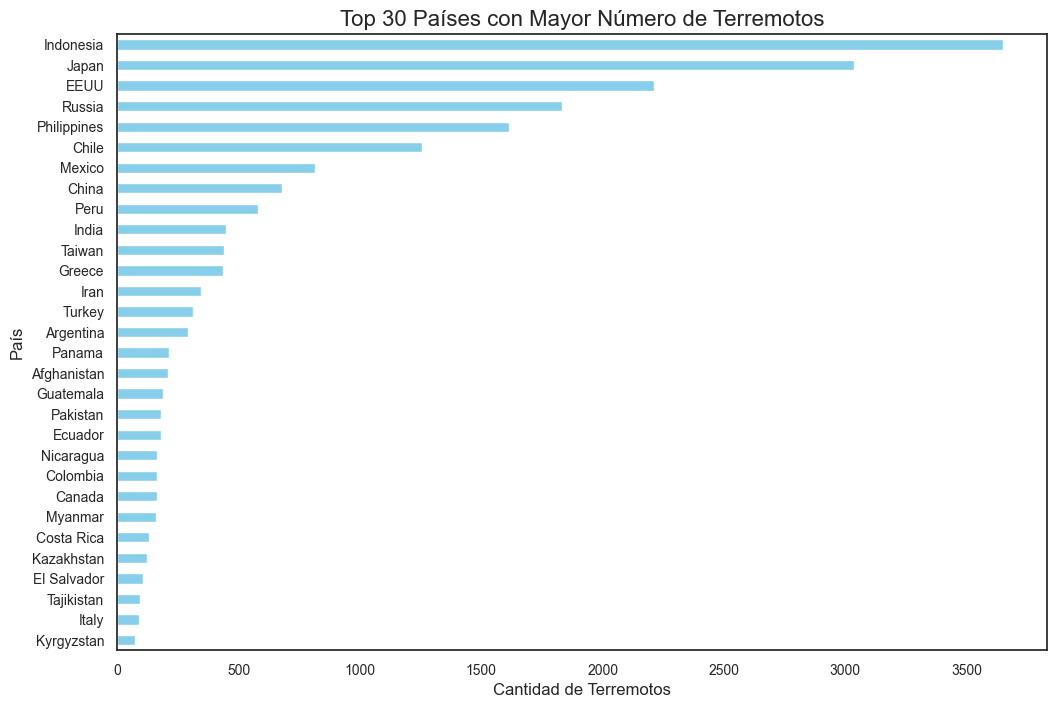

In [68]:
sns.set(style="white")

plt.figure(figsize=(12, 8)) 

dfterremotos_30['Pais'].value_counts().sort_values(ascending=True).tail(30).plot(kind='barh', color='skyblue')  

plt.title('Top 30 Países con Mayor Número de Terremotos', fontsize=16)  
plt.xlabel('Cantidad de Terremotos', fontsize=12)
plt.ylabel('País', fontsize=12) 
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.show()

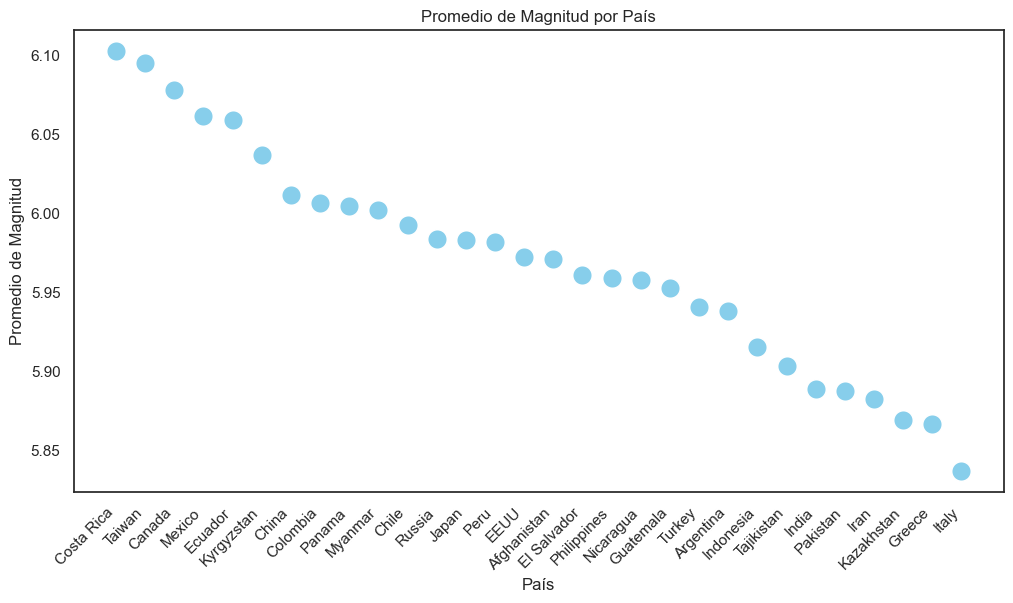

In [69]:
if isinstance(dfterremotos_30, pd.DataFrame):
  
    if all(col in dfterremotos_30.columns for col in ['Pais', 'Mag']):
        
        promedio_magnitud_por_pais = dfterremotos_30.groupby('Pais')['Mag'].mean().sort_values(ascending=False)

        plt.figure(figsize=(12, 6))
        sns.scatterplot(x=promedio_magnitud_por_pais.index, y=promedio_magnitud_por_pais.values, color='skyblue', s=200)  
        plt.title('Promedio de Magnitud por País')
        plt.xlabel('País')
        plt.ylabel('Promedio de Magnitud')
        plt.xticks(rotation=45, ha='right')  
        plt.show()
    else:
        print("Las columnas necesarias ('Pais', 'Mag') no están presentes en el DataFrame.")
else:
    print("dfterremotos_30 no es un DataFrame.")

In [70]:
if isinstance(dfterremotos_30, pd.DataFrame):
    
    if all(col in dfterremotos_30.columns for col in ['Pais', 'Mag']):
        
        pais_con_max_magnitud = dfterremotos_30.loc[dfterremotos_30['Mag'].idxmax()]['Pais']
        
        fig = px.scatter(dfterremotos_30, x='Pais', y='Mag', color='Pais', title='Magnitud por País',
                         labels={'Mag': 'Magnitud', 'Pais': 'País'})
        
        max_magnitud = dfterremotos_30['Mag'].max()
        fig.add_shape(
            type='line',
            x0=pais_con_max_magnitud, x1=pais_con_max_magnitud,
            y0=0, y1=max_magnitud,
            line=dict(color='red', width=2)
        )
        
        fig.update_layout(showlegend=False) 

        fig.show()
        
        print(f"El país con el récord de la magnitud más alta es: {pais_con_max_magnitud}")
    else:
        print("Las columnas necesarias ('Pais', 'Mag').")
else:
    print("dfterremotos_30 no es un DataFrame.")

El país con el récord de la magnitud más alta es: Chile
